In [24]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import seaborn as sns
%matplotlib inline

In [6]:
evo = "https://www.evo.com/shop/snowboard/snowboards/mens/rpp_400"
#house = ''
#steapn_cheap = ''
headers = {'User-agent': 'Mozilla/5.0'}
response = requests.get(evo, headers = headers)


In [25]:
response.status_code

200

In [26]:
soup = BS(response.content,'html.parser')
#save the response as a varible

In [27]:
item = soup.find('div',{'class':'product-thumb-details'})
#testing one item
items = soup.find_all('div',{'class':'product-thumb-details'})
#creating a list of all the code chunks with the needed information

In [28]:
soup_names = []
prices = []
for snowboard in items:
    soup_names.append(snowboard.find('span',{'class':'product-thumb-title'}).text)
    prices.append(snowboard.find('span',{'class':'product-thumb-price'}).text)
    

In [35]:
price=[]
for i in prices:
    price.append(i.split('\n'))   

In [36]:
trim = []
for x in price:
    trim.append(x[2])
price

IndexError: list index out of range

In [38]:
final=[]
dollar_count=[]
just_nums=[]

for y in trim:
    final.append(y.split('$'))
for j in final:
    dollar_count.append(j[1])
for k in dollar_count:
    just_nums.append(float(k.replace(',','')))

In [39]:
fields=[]
brand = []
year = []
names=[]
for name in soup_names:
    fields.append(name.split(' '))
for p in fields:
    brand.append(p[0])
for g in fields:
    year.append(g[-1])
for u in fields:
    names.append(u[0:-2])

In [40]:

price_tag = list(zip(brand,names,year,just_nums))
#price_tag = {'Brand':brand,'Make':names,'Price':just_nums}
columns = ['Brand Model Price']


In [41]:
board_frame = pd.DataFrame(price_tag,columns ='Brand Model Season Evo-Price'.split())

In [42]:
board_frame

,Brand,Model,Season,Evo-Price
0,CAPiTA,"[CAPiTA, Outerspace, Living]",2020,399.95
1,Bataleon,"[Bataleon, Party, Wave]",2020,399.95
2,Bataleon,"[Bataleon, The, Surfer]",2020,799.95
3,Nitro,"[Nitro, The, Quiver, Slash]",2020,599.95
4,Burton,"[Burton, Instigator]",2020,399.95
5,Nitro,"[Nitro, Dropout]",2020,469.95
6,Never,"[Never, Summer, Swift]",2020,619.99
7,Gentemstick,"[Gentemstick, Rocket, Fish, Outline, Core]",2020,1250.00
8,Salomon,"[Salomon, Huck, Knife]",2020,449.95
9,Burton,"[Burton, Kilroy, 3D]",2020,469.95


In [43]:
evo_board_counts = board_frame.groupby('Brand')['Model'].nunique()
evo_board_cost = board_frame.groupby('Brand').mean()


In [44]:
evo_board_counts

Brand
Arbor          6
Bataleon       2
Burton         3
CAPiTA         5
GNU            4
Gentemstick    1
Jones          3
K2             4
Korua          7
Lib            5
Lobster        1
Never          5
Nitro          4
Ride           4
Rossignol      2
Salomon        4
United         1
Yes.           5
Name: Model, dtype: int64

In [45]:
evo_board_cost

,Evo-Price
Brand,
Arbor,496.656667
Bataleon,599.950000
Burton,456.616667
CAPiTA,507.950000
GNU,514.982500
Gentemstick,1250.000000
Jones,733.283333
K2,477.450000
Korua,636.500000


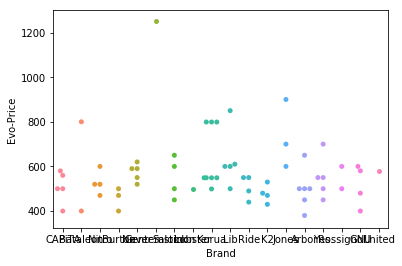

In [93]:
plot = sns.swarmplot(x = "Brand", y = 'Evo-Price', data = board_frame)
plot